<a href="https://colab.research.google.com/github/Crazytiger0527/Study_Pytorch/blob/main/CNN_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## https://halfundecided.medium.com/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-python-keras%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%B4-%EC%86%90%EA%B8%80%EC%94%A8-%EC%88%AB%EC%9E%90-%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC-%EC%9D%B8%EC%8B%9D%ED%95%98%EB%8A%94-cnn-convolutional-neural-networks-%EB%AA%A8%EB%8D%B8-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0-2c7c315e9958
## 1.데이터 준비와 전처리
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of x_test: ' + str(x_test.shape))

# shape of x_train: (60000, 28, 28)
# shape of y_train: (60000,)
# shape of x_test: (10000, 28, 28)
# shape of x_test: (10000, 28, 28)
# x_train : 모델 트레이닝을 위한 28*28크기의 matrix로 표현된 이미지 60000개
# x_test : 모델 구현 후 테스팅을 위한 28*28크기의 matrix로 표현된 이미지 10000개
# x_train : 모델 트레이닝을 위한 60000개의 숫자라벨
# y_test : 모델 구현 후 테스팅을 위한 10000개의 숫자라벨

11490434/11490434 [==============================] - 0s 0us/step
shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)
shape of x_test: (10000, 28, 28)
shape of x_test: (10000, 28, 28)


'\nshape of x_train: (60000, 28, 28)\nshape of y_train: (60000,)\nshape of x_test: (10000, 28, 28)\nshape of x_test: (10000, 28, 28)\nx_train : 모델 트레이닝을 위한 28*28크기의 matrix로 표현된 이미지 60000개\nx_test : 모델 구현 후 테스팅을 위한 28*28크기의 matrix로 표현된 이미지 10000개\nx_train : 모델 트레이닝을 위한 60000개의 숫자라벨\ny_test : 모델 구현 후 테스팅을 위한 10000개의 숫자라벨\n'

In [3]:
# 이미지 데이터모양을 28*28*1로 reshape
x_train_vec = x_train.reshape((60000,28,28,1))
x_test_vec = x_test.reshape((10000,28,28,1))

print("shape of x_train_vec is" + str(x_train_vec.shape))
print("shape of x_test_vec is" + str(x_test_vec.shape))

shape of x_train_vec is(60000, 28, 28, 1)
shape of x_test_vec is(10000, 28, 28, 1)


In [4]:
# y값(label) 전처리
# integer -> One-hot Encoding
import numpy as np

def to_one_hot(labels, dimension=10):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec is '+ str(y_train_vec.shape))
print('Shape of y_test_vec is '+ str(y_test_vec.shape))

Shape of y_train_vec is (60000, 10)
Shape of y_test_vec is (10000, 10)


In [5]:
# Training data의 일부분을 잘라 Validation data 만들기
# Validation data는 트레이닝한 모델을 중간에 확인하기 위한 검증을 하는데 사용
# hyper-parameter를 튜닝하는데에 이용
# overfitting(과적합; 기계 학습에서 데이터에 대한 학습이 너무 많이 수행되는 현상)을 방지하는데 사용
# 5:1 비율로 사용하였음
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:50000]
valid_indices = rand_indices[50000:60000]

x_valid_vec = x_train_vec[valid_indices,:,:,:]
y_valid_vec = y_train_vec[valid_indices,:]

x_train_vec = x_train_vec[train_indices,:,:,:]
y_train_vec = y_train_vec[train_indices,:]

print("shape of x_valid_vec: "+ str(x_valid_vec.shape))
print("shape of y_valid_vec: "+ str(y_valid_vec.shape))
print("shape of x_train_vec: "+ str(x_train_vec.shape))
print("shape of y_train_vec: "+ str(y_train_vec.shape))

shape of x_valid_vec: (10000, 28, 28, 1)
shape of y_valid_vec: (10000, 10)
shape of x_train_vec: (50000, 28, 28, 1)
shape of y_train_vec: (50000, 10)


In [8]:
## 2. CNN모델 만들기
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Sequential모델은 각 layer에 정확히 하나의 input tensor와 하나의 output tensor가 있을 경우 쓰기에 적절한 모델입니다.
model = Sequential()

# 첫번째 Convolution layer
# 필터 갯수 10, 필터 사이즈 5*5, 활성화함수 relu, stride와 padding은 default값
model.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# 두번째 Convolution layer
model.add(Conv2D(filters=20, kernel_size=(5,5), activation='relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer
model.add(Flatten())

# Dense layer
# 추출된 feature들을 하나의 layer로 모으기 위한 layer
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 100)              

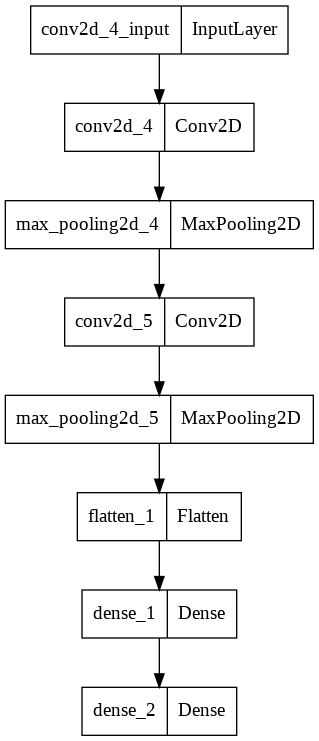

In [9]:
from keras.utils import plot_model

plot_model(model)

In [13]:
## 3.구축한 CNN 모델 학습시키기
from keras.optimizers import RMSprop

# epoch : 전체 데이터 셋에 대해 x번의 학습을 완료하는 상태 ex)50 일경우 전체데이터를 50번 사용하여 학습을 시킴
# epoch값을 잘 설정해야함. 오버피팅, 언더피팅 방지
# batch_size : 모델 트레이닝 과정에서 gradient값을 업데이트 할 때마다 쓰일 데이터 샘플의 갯수
model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_vec, y_train_vec, batch_size=128, epochs=50, validation_data=(x_valid_vec, y_valid_vec))

Epoch 1/50
391/391 [==============================] - 11s 6ms/step - loss: 4.2193 - accuracy: 0.7122 - val_loss: 0.8273 - val_accuracy: 0.8742
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5977 - accuracy: 0.9039 - val_loss: 0.4447 - val_accuracy: 0.9203
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3454 - accuracy: 0.9354 - val_loss: 0.3084 - val_accuracy: 0.9388
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.2360 - accuracy: 0.9499 - val_loss: 0.2462 - val_accuracy: 0.9481
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1763 - accuracy: 0.9591 - val_loss: 0.2312 - val_accuracy: 0.9531
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1408 - accuracy: 0.9657 - val_loss: 0.1817 - val_accuracy: 0.9591
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1121 - accuracy: 0.9711 - val_loss: 0.1613 - val_accuracy: 0.9629
Epoch

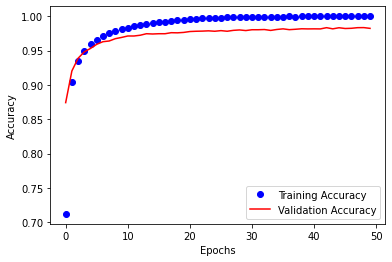

In [14]:
## 4.모델평가
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(50)
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Validation accuracy가 Training accuracy보다 조금 아래에 위치함 - underfitting발생
# 실제 모델 구현시 이 과정에서 hyper-parameter 튜닝이 실행되어야함.
# 하이퍼 파라미터는 모델링할 때 사용자가 직접 세팅해주는 값을 뜻합니다.

In [15]:
# Test data로 모델 테스트
loss_and_acc = model.evaluate(x_test_vec, y_test_vec)
print('loss = '+ str(loss_and_acc[0]))
print('accuracy = '+str(loss_and_acc[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.1201 - accuracy: 0.9822
loss = 0.12012523412704468
accuracy = 0.982200026512146
